In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Covid_Patient_0.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import folium
from sklearn.cluster import KMeans
import matplotlib as mpl

In [3]:
data = pd.read_csv('/kaggle/input/Covid_Patient_0.csv')

In [4]:
data.head()

,State,City Name,Ward No,Ward Name,Patient ID,Age,Gender,Longitude,Latitude,Sample Result,Result Date,Current Status,Acquired Overseas: Y/N,Locally Acquired: Y/N,Contact Determined: Not Identified/Under Investigation
0,Uttar Pradesh,Agra,29,Khandari,1,NaN,M,77.993638,27.205092,NaN,NaN,NaN,NaN,NaN,NaN
1,Uttar Pradesh,Agra,29,Khandari,2,NaN,M,77.993638,27.205246,NaN,NaN,NaN,NaN,NaN,NaN
2,Uttar Pradesh,Agra,29,Khandari,3,NaN,M,77.993652,27.205177,NaN,NaN,NaN,NaN,NaN,NaN
3,Uttar Pradesh,Agra,29,Khandari,4,NaN,F,77.993659,27.205302,NaN,NaN,NaN,NaN,NaN,NaN
4,Uttar Pradesh,Agra,29,Khandari,5,NaN,M,77.993624,27.205152,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.columns

Index(['State', 'City Name', 'Ward No', 'Ward Name', 'Patient ID', 'Age',
       'Gender', 'Longitude', 'Latitude', 'Sample Result', 'Result Date',
       'Current Status', 'Acquired Overseas: Y/N', 'Locally Acquired: Y/N',
       'Contact Determined: Not Identified/Under Investigation'],
      dtype='object')

In [6]:
unneccesary_cols = ['State', 'City Name', 'Age', 'Sample Result', 'Result Date',
       'Current Status', 'Acquired Overseas: Y/N', 'Locally Acquired: Y/N',
       'Contact Determined: Not Identified/Under Investigation']

In [7]:
data_ = data.drop(unneccesary_cols, axis=1)

In [8]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ward No     649 non-null    object 
 1   Ward Name   702 non-null    object 
 2   Patient ID  702 non-null    int64  
 3   Gender      702 non-null    object 
 4   Longitude   702 non-null    float64
 5   Latitude    702 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 33.0+ KB


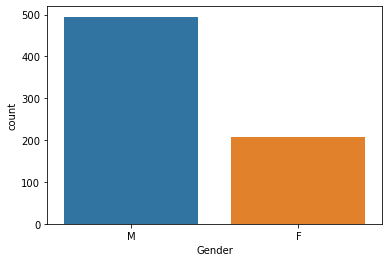

In [9]:
sns.countplot(data['Gender'])

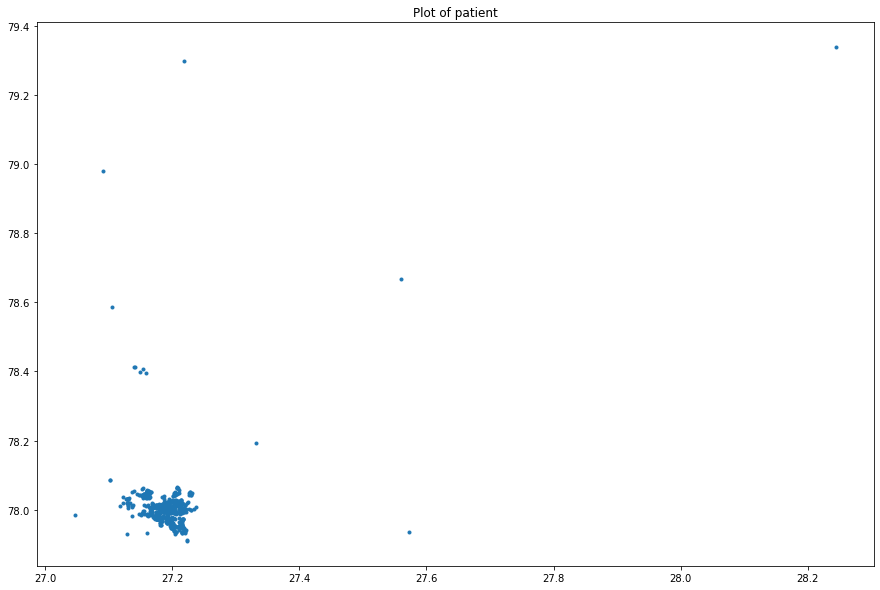

In [10]:
plt.figure(figsize=(15,10))
plt.plot(data['Latitude'], data['Longitude'],'.')
plt.title('Plot of patient')
plt.show()

In [11]:
m = folium.Map(location=[27.1767,78.0081])

In [12]:
Latitude=data_['Latitude']
Longitude=data_['Longitude']
for i in range(702):
    folium.Marker([Latitude[i],Longitude[i]],popup = data.loc[i,'Patient ID'] ).add_to(m)
m

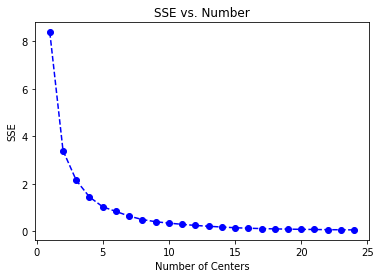

In [13]:
def get_kmeans_score(data_, center):
    '''
    returns the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
  
    kmeans = KMeans(n_clusters=center)
    model = kmeans.fit(data_)
    score = np.abs(model.score(data_))
    
    return score

scores = []
centers = list(range(1,25))

for center in centers:
    scores.append(get_kmeans_score(data.loc[: ,['Longitude','Latitude']], center))
    
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('Number of Centers');
plt.ylabel('SSE');
plt.title('SSE vs. Number');

In [14]:
kmeans = KMeans(n_clusters=1)

kmeans.fit(data.loc[: ,['Longitude','Latitude']]).cluster_centers_


array([[78.01176175, 27.1895935 ]])

In [15]:
m_ =folium.Map(location=[27.1767,78.0081], zoom_start = 14)

In [16]:
folium.Marker([27.1895935,78.01176175],popup = 'Cluster Center', icon=folium.Icon(color='red') ).add_to(m_)
#folium.Marker([27.4435962,78.974229],popup = 'Cluster Center', icon=folium.Icon(color='red') ).add_to(m)
#folium.Marker([28.24392,79.338459],popup = 'Cluster Center', icon=folium.Icon(color='red') ).add_to(m)
#folium.Marker([27.20099343,78.46841514],popup = 'Cluster Center', icon=folium.Icon(color='red') ).add_to(m)
#folium.Marker([27.1808203,78.02358465],popup = 'Cluster Center', icon=folium.Icon(color='red') ).add_to(m)

In [17]:
m_

# center is near st.jons inter college